In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score ,f1_score,classification_report, confusion_matrix


In [56]:
df= pd.read_csv("./Dataset/Placement_Data_Full_Class.csv")

In [57]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [59]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [60]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

EDA

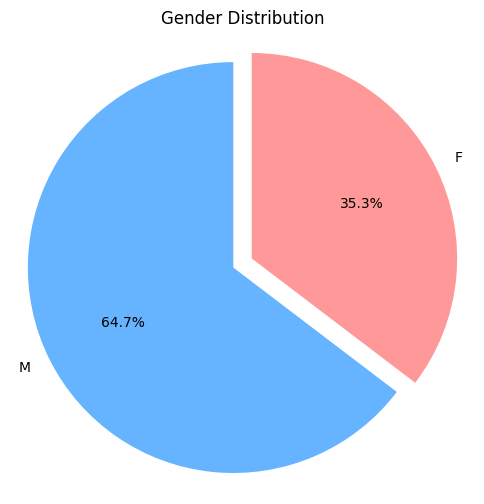

In [64]:
# Create a pie chart for gender distribution
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], explode=(0.1, 0))
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
gender_count = df.groupby('gender').status.value_counts()
gender_count

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: count, dtype: int64

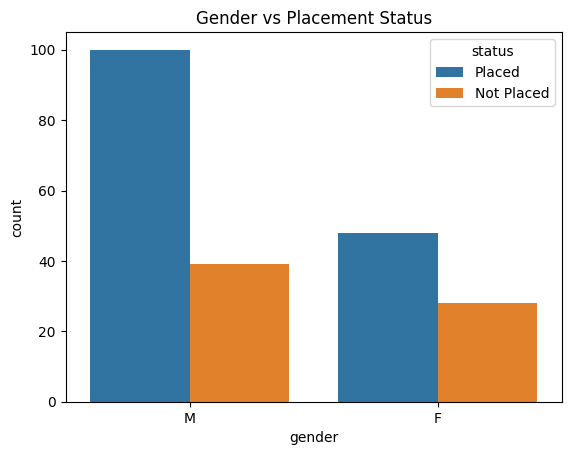

In [52]:
# Countplot for gender and placement status
sns.countplot(x='gender', hue='status', data=df)
plt.title("Gender vs Placement Status")
plt.show()

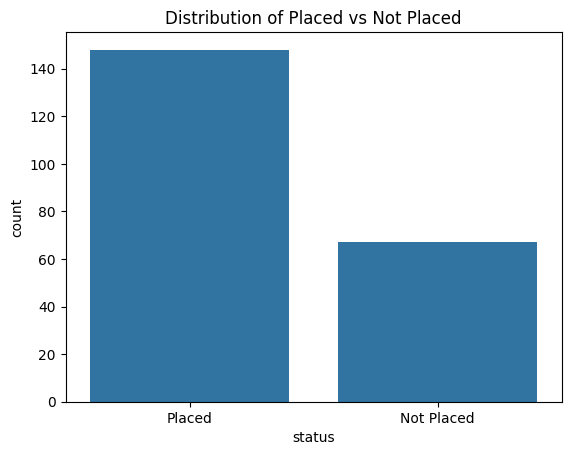

In [63]:
# Visualize the distribution of the 'status' variable

sns.countplot(x='status', data=df)
plt.title("Distribution of Placed vs Not Placed")
plt.show()

In [53]:
work_ex_count = df.groupby('workex').status.value_counts()
work_ex_count

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: count, dtype: int64

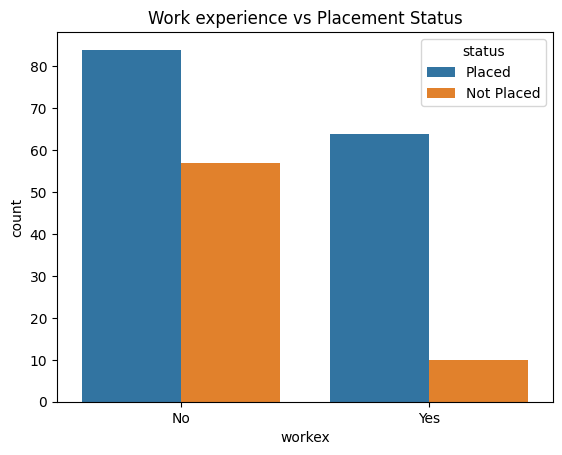

In [54]:
# Countplot for Work experience and placement status
sns.countplot(x='workex', hue='status', data=df)
plt.title("Work experience vs Placement Status")
plt.show()

In [65]:
specialization_count = df.groupby('specialisation').status.value_counts()
specialization_count

specialisation  status    
Mkt&Fin         Placed        95
                Not Placed    25
Mkt&HR          Placed        53
                Not Placed    42
Name: count, dtype: int64

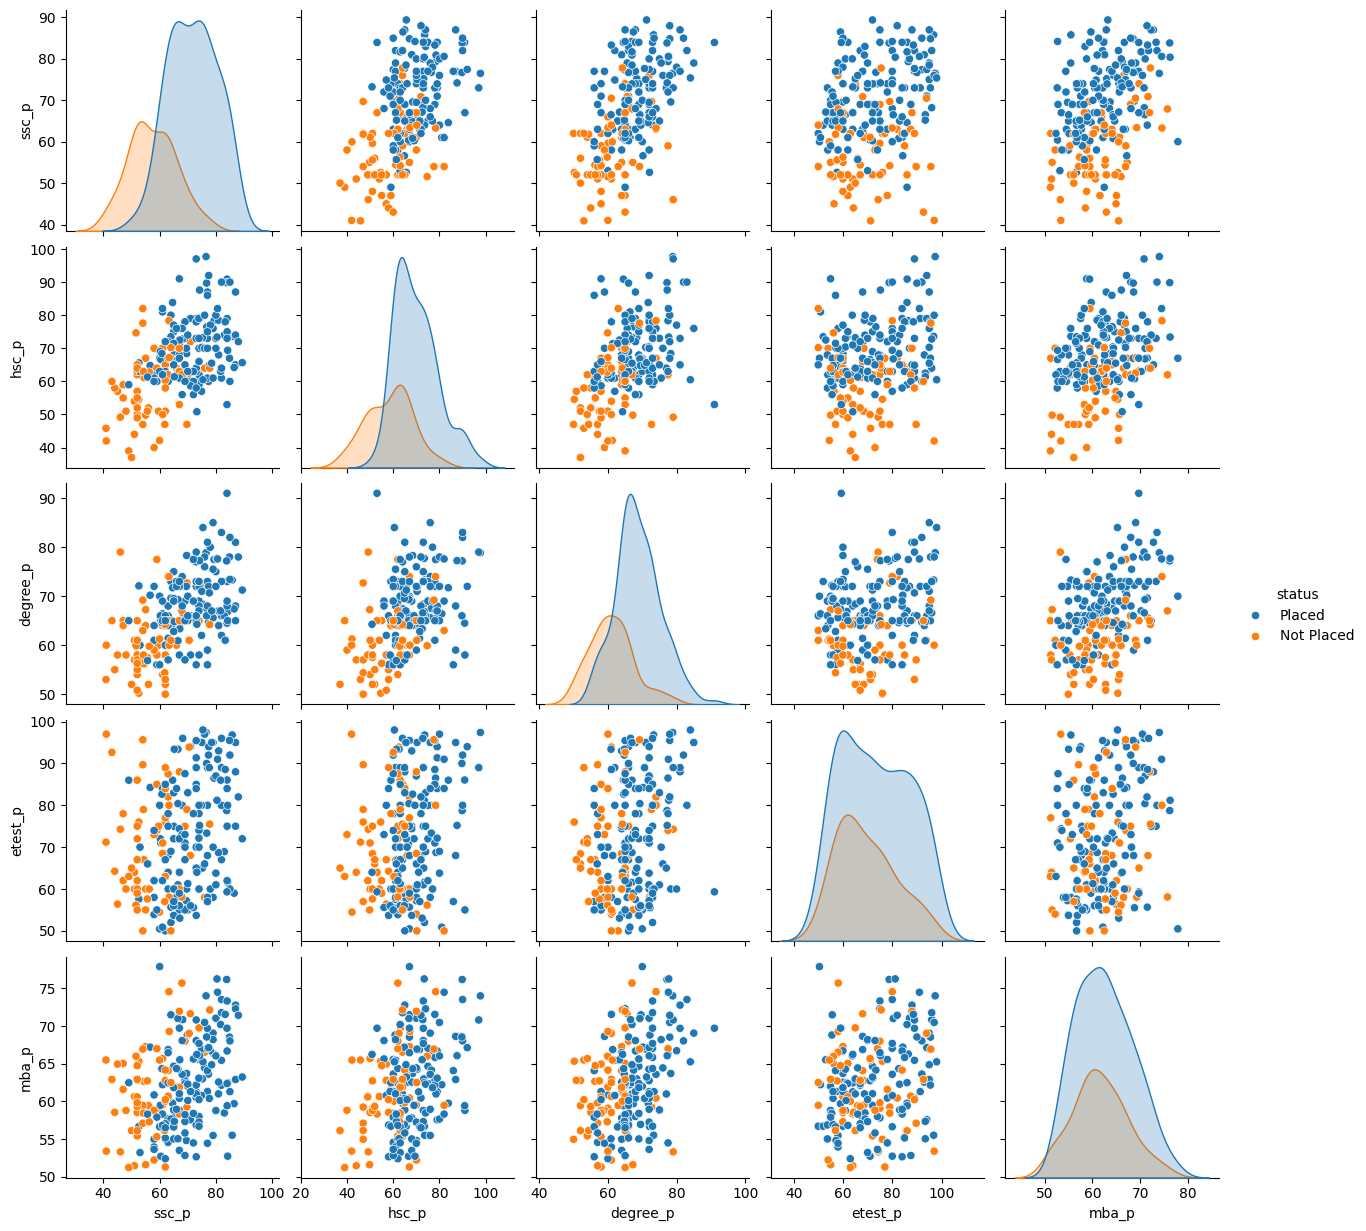

In [67]:
# List of numerical columns
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Creating a pairplot colored by 'status'
sns.pairplot(df[numerical_cols + ['status']], hue='status')
plt.show()
